In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
from scipy.stats import linregress, pearsonr
%matplotlib inline
import matplotlib


In [2]:
#clean.csv data has been updated to include Distance to Hydrant and "CountyName"
master_data = "clean.csv"
master_data_df = pd.read_csv(master_data)

master_data_df

list(master_data_df) 



['Id',
 'OwnerCity',
 'OwnerState',
 'PropertyLocationStreet1',
 'PropertyCity',
 'PropertyZip',
 'CountyName',
 'StateParcelId',
 'ParcelSize',
 'ValueofHome',
 'YearBuilt',
 'TypeOfResidence',
 'NumberOfStories',
 'AdjSquareFeet',
 'Pool',
 'PPC',
 'BCEG',
 'DistancetoCoast',
 'PoliceID',
 'Crime',
 'FireID',
 'DistancetoHydrant',
 'DistancetoFireDepartment',
 'DistancetoSinkhole',
 'SinkholeLatitude',
 'SinkholeLongitude',
 'LocationWindSpeed',
 'WindborneDebrisRegion',
 'Terrain',
 'FloodZone',
 'FloodZoneRiskLevel']

In [3]:
#Accessibility to fire protection services

fire_master_df = master_data_df[["Id", "OwnerState", "PropertyCity", "PropertyZip", "CountyName", "PPC", "DistancetoHydrant", "FireID","DistancetoFireDepartment","ValueofHome"]]

fire_master_df



,Id,OwnerState,PropertyCity,PropertyZip,CountyName,PPC,DistancetoHydrant,FireID,DistancetoFireDepartment,ValueofHome
0,12009f31026acc440,NC,MELBOURNE,32940,BREVARD,NaN,NaN,NaN,1.67,360350.0
1,120112bfc77a87376,VA,MIRAMAR,33027,BROWARD,3,NaN,645.0,2.37,228680.0
2,12081776a04b281f4,VA,BRADENTON,34210,MANATEE,3,309.12,NaN,0.96,135000.0
3,12103fabafeea9fb7,VA,SAINT PETERSBURG,33701,PINELLAS,NaN,NaN,855.0,1.08,87660.0
4,120213b0f5f17e3d1,SC,NAPLES,34108,COLLIER,NaN,NaN,50.0,1.37,663090.0
...,...,...,...,...,...,...,...,...,...,...
223,12086e1ddd12521cd,SC,DORAL,33178,MIAMI-DADE,4,150.99,NaN,0.27,329160.0
224,120861813f1294d56,VA,MIAMI BEACH,33141,MIAMI-DADE,1,NaN,627.0,0.71,924061.0
225,12089ed366ee68b8e,NC,FERNANDINA BEACH,32034,NASSAU,3,NaN,359.0,1.23,274291.0
226,1211544028709F1DD,VA,SARASOTA,34242,SARASOTA,NaN,338.08,NaN,1.13,267400.0


In [4]:
#Analyses between PPC and home value.
#An ISO fire insurance rating, also referred to as a fire score or Public Protection Classification (PPC)
#PPC is a score from 1 to 10 that indicates how well-protected your community is by the fire department. 
#In the ISO rating scale, a lower number is better: 1 is the best rating, while 10 means the fire department did not meet the ISO's minimum requirements.

ppc_df = fire_master_df[["PPC", "ValueofHome"]]

#Clean up PPC DataFrame to exclude rows where PPC data is shown as nulls.
#Changed PPC data from object to integers.
ppc_df["PPC"] = pd.to_numeric(ppc_df["PPC"],errors='coerce')
clean_ppc_df = ppc_df.dropna()


clean_ppc_df

/Users/ajwu/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,PPC,ValueofHome
1,3.0,228680.0
2,3.0,135000.0
5,2.0,298880.0
6,2.0,141668.0
7,2.0,161169.0
...,...,...
220,2.0,151500.0
221,4.0,203651.0
223,4.0,329160.0
224,1.0,924061.0


In [5]:
clean_ppc_df.dtypes  

PPC            float64
ValueofHome    float64
dtype: object

The correlation between PPC and home value is 0.06, indicating NO correlation.
The linear regression equation between PPC and Value of Home is y = 8231.3x + 234317.03.
The r-squared is: 0.003398081842361495


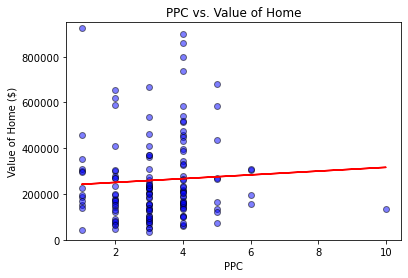

<Figure size 432x288 with 0 Axes>

In [6]:
#Correlation between PPC rating & value of home.
PPC = clean_ppc_df["PPC"]
Value = clean_ppc_df["ValueofHome"]

correlation = st.pearsonr(PPC, Value)

scatter1 = plt.scatter(PPC, Value, marker="o", facecolors="blue", edgecolors="black", alpha=0.5)
(slope, intercept, rvalue, pvalue, stderr) = linregress(PPC, Value)

regress_values = PPC * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"The correlation between PPC and home value is {round(correlation[0],2)}, indicating NO correlation.")
print(f"The linear regression equation between PPC and Value of Home is {line_eq}.")
print(f"The r-squared is: {rvalue**2}")
plt.plot(PPC,regress_values,"r-")
plt.title("PPC vs. Value of Home")
plt.ylabel("Value of Home ($)")
plt.xlabel("PPC")
plt.ylim(0, 10)
plt.ylim(0, 950000)
plt.show()
plt.tight_layout()

In [7]:
#Analyses between distance to fire hydrant & value of home.
hydrant_df = fire_master_df[["DistancetoHydrant", "ValueofHome"]]

#Clean up hydrant DataFrame to exclude rows where distance data is shown as nulls.
clean_hydrant_df = hydrant_df.dropna()

clean_hydrant_df

,DistancetoHydrant,ValueofHome
2,309.12,135000.0
15,280.90,152459.0
16,933.54,88850.0
17,200.14,77100.0
21,366.00,155519.0
...,...,...
219,228.86,91800.0
221,120.89,203651.0
223,150.99,329160.0
226,338.08,267400.0


In [8]:
clean_hydrant_df.dtypes

DistancetoHydrant    float64
ValueofHome          float64
dtype: object

The correlation between distance to fire hydrant and home value is -0.06, indicating NO correlation.
The linear regression equation between distance to hydrant and home value is y = -33.24x + 199890.33.
The r-squared is: 0.0033293792916774074


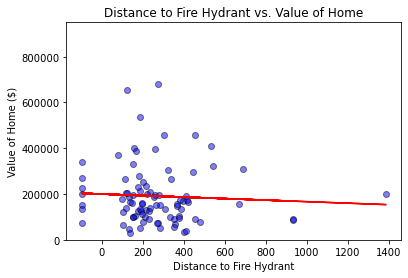

<Figure size 432x288 with 0 Axes>

In [9]:
#Correlation between distance to fire hydrant & value of home.
hydrant_dist = clean_hydrant_df["DistancetoHydrant"]
Value2 = clean_hydrant_df["ValueofHome"]

correlation2 = st.pearsonr(hydrant_dist, Value2)

scatter2 = plt.scatter(hydrant_dist, Value2, marker="o", facecolors="blue", edgecolors="black", alpha=0.5)
(slope2, intercept2, rvalue2, pvalue2, stderr2) = linregress(hydrant_dist, Value2)

regress_values2 = hydrant_dist * slope2 + intercept2

line_eq2 = "y = " + str(round(slope2,2)) + "x + " + str(round(intercept2,2))

print(f"The correlation between distance to fire hydrant and home value is {round(correlation2[0],2)}, indicating NO correlation.")
print(f"The linear regression equation between distance to hydrant and home value is {line_eq2}.")
print(f"The r-squared is: {rvalue2**2}")
plt.plot(hydrant_dist,regress_values2,"r-")

plt.title("Distance to Fire Hydrant vs. Value of Home")
plt.ylabel("Value of Home ($)")
plt.xlabel("Distance to Fire Hydrant")
plt.ylim(0, 1400)
plt.ylim(0, 950000)
plt.show()
plt.tight_layout()


In [10]:
#Analysis between distance to fire station & value of home.
firestation_df = fire_master_df[["DistancetoFireDepartment", "ValueofHome"]]

#Clean up firestation DataFrame to exclude rows where distance data is shown as nulls.
clean_firestation_df = firestation_df.dropna()

clean_firestation_df

,DistancetoFireDepartment,ValueofHome
0,1.67,360350.0
1,2.37,228680.0
2,0.96,135000.0
3,1.08,87660.0
4,1.37,663090.0
...,...,...
223,0.27,329160.0
224,0.71,924061.0
225,1.23,274291.0
226,1.13,267400.0


In [11]:
clean_firestation_df.dtypes

DistancetoFireDepartment    float64
ValueofHome                 float64
dtype: object

The correlation between distance to fire station and home value is 0.08, indicating NO correlation.
The linear regression equation between distance to firestation and home value is y = 22261.21x + 225239.76.
The r-squared is: 0.0063407604424575255


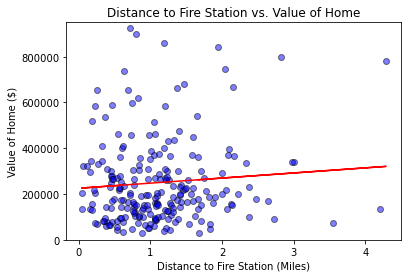

<Figure size 432x288 with 0 Axes>

In [12]:
#Correlation between distance to fire station & value of home.
firestation_dist = clean_firestation_df["DistancetoFireDepartment"]
Value3 = clean_firestation_df["ValueofHome"]

correlation3 = st.pearsonr(firestation_dist, Value3)

scatter3 = plt.scatter(firestation_dist, Value3, marker="o", facecolors="blue", edgecolors="black", alpha=0.5)
(slope3, intercept3, rvalue3, pvalue3, stderr3) = linregress(firestation_dist, Value3)

regress_values3 = firestation_dist * slope3 + intercept3

line_eq3 = "y = " + str(round(slope3,2)) + "x + " + str(round(intercept3,2))

print(f"The correlation between distance to fire station and home value is {round(correlation3[0],2)}, indicating NO correlation.")
print(f"The linear regression equation between distance to firestation and home value is {line_eq3}.")
print(f"The r-squared is: {rvalue3**2}")

plt.plot(firestation_dist,regress_values3,"r-")
plt.title("Distance to Fire Station vs. Value of Home")
plt.ylabel("Value of Home ($)")
plt.xlabel("Distance to Fire Station (Miles)")
plt.ylim(0, 1400)
plt.ylim(0, 950000)
plt.show()
plt.tight_layout()

In [13]:
# PPC Focus: What are the typical PPC ratings of homes owned by NC, SC and VA residents?
ppc_master_df = fire_master_df[["Id", "PropertyCity", "PropertyZip", "CountyName", "PPC", "ValueofHome"]]

#Changed PPC data from object to integers.
#Clean up PPC DataFrame to exclude rows where PPC data is shown as nulls.
ppc_master_df["PPC"] = pd.to_numeric(ppc_master_df["PPC"],errors='coerce')
clean_ppc_master_df = ppc_master_df.dropna()

clean_ppc_master_df

#ppc_groups_df = clean_ppc_master_df.groupby(["PPC","CountyName"])
ppc_only_df = clean_ppc_master_df[["PPC", "Id"]]
ppc_groups = ppc_only_df.groupby(["PPC"])
ppc_count = ppc_groups["Id"].count()

ppc_count

/Users/ajwu/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


PPC
1.0     13
2.0     26
3.0     41
4.0     43
5.0      9
6.0      4
10.0     1
Name: Id, dtype: int64

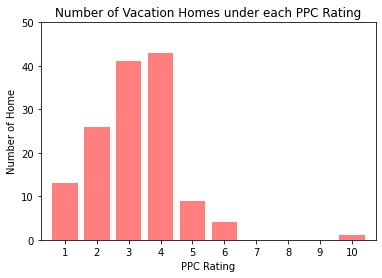

<Figure size 432x288 with 0 Axes>

In [14]:
#Create a bar graph showing numbers of home that fall under each PPC rating.

PPC_Ratings = ["1", "2", "3", "4", "5", "6", "7", "8", "9", "10"]
Home_Numbers = [13, 26, 41, 43, 9, 4, 0, 0, 0, 1]

x_axis = np.arange(len(PPC_Ratings))
plt.bar(x_axis, Home_Numbers, color="r", alpha=0.5, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, PPC_Ratings)
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, 50)
plt.title("Number of Vacation Homes under each PPC Rating")
plt.xlabel("PPC Rating")
plt.ylabel("Number of Home")
plt.savefig("VacHomes_PPC.jpg")
plt.show()
plt.tight_layout()


NC, SC and VA residents buy homes in 23 counties in FL, including ['BROWARD' 'MANATEE' 'PINELLAS' 'BREVARD' 'MIAMI-DADE' 'PALM BEACH'
 'SARASOTA' 'CHARLOTTE' 'DUVAL' 'COLLIER' 'LEE' 'SEMINOLE' 'MARION'
 'VOLUSIA' 'SAINT JOHNS' 'BAY' 'HILLSBOROUGH' 'ALACHUA' 'INDIAN RIVER'
 'ESCAMBIA' 'NASSAU' 'ORANGE' 'MONROE'].


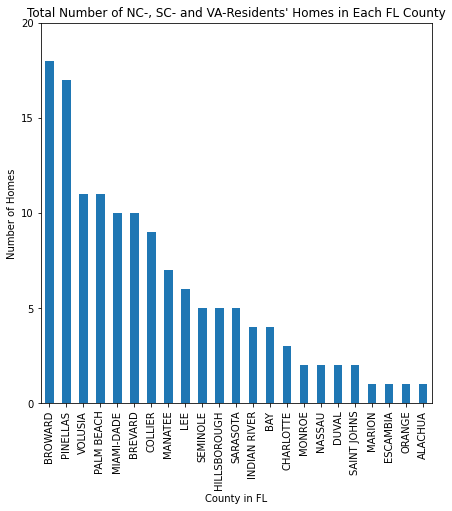

<Figure size 432x288 with 0 Axes>

In [15]:
# PPC Focus: Amongst the counties that NC, SC and VA residents have a vacation home, which
# ones have the higher PPC ratings?

# Which counties have NC, SC and VA-residents purchased their homes? 
county_list = clean_ppc_master_df["CountyName"].unique()
print(f"NC, SC and VA residents buy homes in 23 counties in FL, including {county_list}.")

county_only_df = clean_ppc_master_df[["CountyName", "Id"]]
county_groups = county_only_df.groupby(["CountyName"])
county_count = county_groups["Id"].count()
county_count = county_count.sort_values(ascending=False)
county_count_plot = county_count.plot(kind="bar", figsize=(7,7))

plt.title("Total Number of NC-, SC- and VA-Residents' Homes in Each FL County")
plt.ylabel("Number of Homes")
plt.xlabel("County in FL")
plt.ylim(0, 20)
plt.yticks(np.arange(0, 25, 5))
plt.savefig("VacHomes_county.jpg")
plt.show()
plt.tight_layout()



In [16]:
# Get PPC data from each county that NC, SC, and VA residents have a second home?

file = 'House_price_multifeatures.csv'
df = pd.read_csv(file)
county_PPC_df = df[["Id", "CountyName", "PPC", "ValueofHome"]]

#Drop duplicates from all homes in original dataset.
county_PPC_df = county_PPC_df.drop_duplicates(subset=['Id'])
#Changed PPC and Value of Home data from object to integers.
#Clean up original dataset to exclude rows where data is shown as nulls.
county_PPC_df["PPC"] = pd.to_numeric(county_PPC_df["PPC"],errors='coerce')
county_PPC_df["ValueofHome"] = pd.to_numeric(county_PPC_df["ValueofHome"],errors='coerce')
county_PPC_df = county_PPC_df.dropna()

BROWARD_PPC_df = county_PPC_df.loc[(county_PPC_df["CountyName"] == "BROWARD"), :]
MANATEE_PPC_df = county_PPC_df.loc[(county_PPC_df["CountyName"] == "MANATEE"), :]
PINELLAS_PPC_df = county_PPC_df.loc[(county_PPC_df["CountyName"] == "PINELLAS"), :]
BREVARD_PPC_df = county_PPC_df.loc[(county_PPC_df["CountyName"] == "BREVARD"), :]
MIAMI_DADE_PPC_df = county_PPC_df.loc[(county_PPC_df["CountyName"] == "MIAMI-DADE"), :]
PALM_BEACH_PPC_df = county_PPC_df.loc[(county_PPC_df["CountyName"] == "PALM BEACH"), :]
SARASOTA_PPC_df = county_PPC_df.loc[(county_PPC_df["CountyName"] == "SARASOTA"), :]
CHARLOTTE_PPC_df = county_PPC_df.loc[(county_PPC_df["CountyName"] == "CHARLOTTE"), :]
DUVAL_PPC_df = county_PPC_df.loc[(county_PPC_df["CountyName"] == "DUVAL"), :]
COLLIER_PPC_df = county_PPC_df.loc[(county_PPC_df["CountyName"] == "COLLIER"), :]
LEE_PPC_df = county_PPC_df.loc[(county_PPC_df["CountyName"] == "LEE"), :]
SEMINOLE_PPC_df = county_PPC_df.loc[(county_PPC_df["CountyName"] == "SEMINOLE"), :]
MARION_PPC_df = county_PPC_df.loc[(county_PPC_df["CountyName"] == "MARION"), :]
VOLUSIA_PPC_df = county_PPC_df.loc[(county_PPC_df["CountyName"] == "VOLUSIA"), :]
SAINT_JOHNS_PPC_df = county_PPC_df.loc[(county_PPC_df["CountyName"] == "SAINT JOHNS"), :]
BAY_PPC_df = county_PPC_df.loc[(county_PPC_df["CountyName"] == "BAY"), :]
HILLSBOROUGH_PPC_df = county_PPC_df.loc[(county_PPC_df["CountyName"] == "HILLSBOROUGH"), :]
ALACHUA_PPC_df = county_PPC_df.loc[(county_PPC_df["CountyName"] == "ALACHUA"), :]
INDIAN_RIVER_PPC_df = county_PPC_df.loc[(county_PPC_df["CountyName"] == "INDIAN RIVER"), :]
ESCAMBIA_PPC_df = county_PPC_df.loc[(county_PPC_df["CountyName"] == "ESCAMBIA"), :]
NASSAU_PPC_df = county_PPC_df.loc[(county_PPC_df["CountyName"] == "NASSAU"), :]
ORANGE_PPC_df = county_PPC_df.loc[(county_PPC_df["CountyName"] == "ORANGE"), :]
MONROE_PPC_df = county_PPC_df.loc[(county_PPC_df["CountyName"] == "MONROE"), :]

favcounty_final = pd.merge(BROWARD_PPC_df, MANATEE_PPC_df, how = "outer")
favcounty_final = pd.merge(favcounty_final, PINELLAS_PPC_df, how = "outer")
favcounty_final = pd.merge(favcounty_final, BREVARD_PPC_df, how = "outer")
favcounty_final = pd.merge(favcounty_final, MIAMI_DADE_PPC_df, how = "outer")
favcounty_final = pd.merge(favcounty_final, PALM_BEACH_PPC_df, how = "outer")
favcounty_final = pd.merge(favcounty_final, SARASOTA_PPC_df, how = "outer")
favcounty_final = pd.merge(favcounty_final, CHARLOTTE_PPC_df, how = "outer")
favcounty_final = pd.merge(favcounty_final, DUVAL_PPC_df, how = "outer")
favcounty_final = pd.merge(favcounty_final, COLLIER_PPC_df, how = "outer")
favcounty_final = pd.merge(favcounty_final, LEE_PPC_df , how = "outer")
favcounty_final = pd.merge(favcounty_final, SEMINOLE_PPC_df, how = "outer")
favcounty_final = pd.merge(favcounty_final, MARION_PPC_df, how = "outer")
favcounty_final = pd.merge(favcounty_final, VOLUSIA_PPC_df, how = "outer")
favcounty_final = pd.merge(favcounty_final, SAINT_JOHNS_PPC_df, how = "outer")
favcounty_final = pd.merge(favcounty_final, BAY_PPC_df, how = "outer")
favcounty_final = pd.merge(favcounty_final, HILLSBOROUGH_PPC_df , how = "outer")
favcounty_final = pd.merge(favcounty_final, ALACHUA_PPC_df , how = "outer")
favcounty_final = pd.merge(favcounty_final, INDIAN_RIVER_PPC_df, how = "outer")
favcounty_final = pd.merge(favcounty_final, ESCAMBIA_PPC_df, how = "outer")
favcounty_final = pd.merge(favcounty_final, NASSAU_PPC_df, how = "outer")
favcounty_final = pd.merge(favcounty_final, ORANGE_PPC_df, how = "outer")
favcounty_final = pd.merge(favcounty_final, MONROE_PPC_df, how = "outer")

favcounty_final2= favcounty_final.dropna(subset=["PPC"])

county_gp = favcounty_final2.groupby(["CountyName"])
county_home = county_gp["Id"].count()
county_PPC = county_gp["PPC"].mean()
county_PPC_std = county_gp["PPC"].std()
county_value = county_gp["ValueofHome"].mean()
county_value_std = county_gp["ValueofHome"].std()

vacation_gp = clean_ppc_master_df.groupby(["CountyName"])
vacation_home = vacation_gp["Id"].count()
vacation_PPC = vacation_gp["PPC"].mean()
vacation_PPC_std = vacation_gp["PPC"].std()
vacation_value = vacation_gp["ValueofHome"].mean()
vacation_value_std = vacation_gp["ValueofHome"].std()

summary_df = pd.DataFrame(county_home)
summary_df["Avg. PPC Rating (County)"] = round(county_PPC,2)
summary_df["Std PPC Rating (County)"] = round(county_PPC_std,2)
summary_df["Avg. Home Value (County)"] = round(county_value,2)
summary_df["Std Home Value (County)"] = round(county_value_std,2)

summary_df["Total Vacation Homes"] = vacation_home
summary_df["Avg. PPC Rating (Vacation)"] = round(vacation_PPC,2)
summary_df["Std PPC Rating (Vacation)"] = round(vacation_PPC_std,2)
summary_df["Avg. Home Value (Vacation)"] = round(vacation_value,2)
summary_df["Std Home Value (Vacation)"] = round(vacation_value_std,2)

summary_df


/Users/ajwu/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (12) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Id,Avg. PPC Rating (County),Std PPC Rating (County),Avg. Home Value (County),Std Home Value (County),Total Vacation Homes,Avg. PPC Rating (Vacation),Std PPC Rating (Vacation),Avg. Home Value (Vacation),Std Home Value (Vacation)
CountyName,,,,,,,,,,
ALACHUA,132,3.34,0.83,147825.00,77903.38,1,3.00,NaN,140100.00,NaN
BAY,222,5.14,0.97,164216.24,127739.48,4,5.50,1.00,218045.75,115271.31
BREVARD,1127,3.99,0.78,189255.78,135455.04,10,4.10,0.32,336082.00,204553.06
BROWARD,10073,2.05,0.94,251461.10,170183.96,18,2.39,1.09,281956.11,130504.84
CHARLOTTE,355,4.34,0.86,158553.65,111294.03,3,4.00,0.00,161067.33,6320.71
COLLIER,1149,3.56,1.24,419967.88,564184.73,9,3.22,0.67,505801.00,258021.98
DUVAL,226,2.85,0.36,184162.32,167833.84,2,3.00,0.00,138761.00,124112.80
ESCAMBIA,100,3.33,1.36,139806.49,117476.51,1,2.00,NaN,234052.00,NaN
HILLSBOROUGH,1497,3.55,1.06,189447.63,177686.09,5,3.80,1.10,120123.80,57388.87


In [17]:
#Property Crime Rate per 100,000 Population (2019)

file2 = 'FL_CRIME_RATE.csv'
crime_df = pd.read_csv(file2)
crime_df = crime_df[["CountyName", "Property Crime Rate"]]
summary_df = pd.merge(crime_df, summary_df, how = "outer", on="CountyName")

summary_df



,CountyName,Property Crime Rate,Id,Avg. PPC Rating (County),Std PPC Rating (County),Avg. Home Value (County),Std Home Value (County),Total Vacation Homes,Avg. PPC Rating (Vacation),Std PPC Rating (Vacation),Avg. Home Value (Vacation),Std Home Value (Vacation)
0,ALACHUA,2710.4,132,3.34,0.83,147825.00,77903.38,1,3.00,NaN,140100.00,NaN
1,BAY,3905.4,222,5.14,0.97,164216.24,127739.48,4,5.50,1.00,218045.75,115271.31
2,BREVARD,2063.9,1127,3.99,0.78,189255.78,135455.04,10,4.10,0.32,336082.00,204553.06
3,BROWARD,2605.5,10073,2.05,0.94,251461.10,170183.96,18,2.39,1.09,281956.11,130504.84
4,CHARLOTTE,1364.9,355,4.34,0.86,158553.65,111294.03,3,4.00,0.00,161067.33,6320.71
5,COLLIER,1381.4,1149,3.56,1.24,419967.88,564184.73,9,3.22,0.67,505801.00,258021.98
6,DUVAL,3884.9,226,2.85,0.36,184162.32,167833.84,2,3.00,0.00,138761.00,124112.80
7,ESCAMBIA,2865.5,100,3.33,1.36,139806.49,117476.51,1,2.00,NaN,234052.00,NaN
8,HILLSBOROUGH,1380.4,1497,3.55,1.06,189447.63,177686.09,5,3.80,1.10,120123.80,57388.87
9,INDIAN RIVER,1352.1,284,4.00,0.00,152065.49,190987.44,4,4.00,0.00,410254.75,212300.27


In [18]:
summary_df = summary_df.rename(columns={"Id": "Total County Homes"})

summary_df = summary_df.fillna(0)

summary_df

,CountyName,Property Crime Rate,Total County Homes,Avg. PPC Rating (County),Std PPC Rating (County),Avg. Home Value (County),Std Home Value (County),Total Vacation Homes,Avg. PPC Rating (Vacation),Std PPC Rating (Vacation),Avg. Home Value (Vacation),Std Home Value (Vacation)
0,ALACHUA,2710.4,132,3.34,0.83,147825.00,77903.38,1,3.00,0.00,140100.00,0.00
1,BAY,3905.4,222,5.14,0.97,164216.24,127739.48,4,5.50,1.00,218045.75,115271.31
2,BREVARD,2063.9,1127,3.99,0.78,189255.78,135455.04,10,4.10,0.32,336082.00,204553.06
3,BROWARD,2605.5,10073,2.05,0.94,251461.10,170183.96,18,2.39,1.09,281956.11,130504.84
4,CHARLOTTE,1364.9,355,4.34,0.86,158553.65,111294.03,3,4.00,0.00,161067.33,6320.71
5,COLLIER,1381.4,1149,3.56,1.24,419967.88,564184.73,9,3.22,0.67,505801.00,258021.98
6,DUVAL,3884.9,226,2.85,0.36,184162.32,167833.84,2,3.00,0.00,138761.00,124112.80
7,ESCAMBIA,2865.5,100,3.33,1.36,139806.49,117476.51,1,2.00,0.00,234052.00,0.00
8,HILLSBOROUGH,1380.4,1497,3.55,1.06,189447.63,177686.09,5,3.80,1.10,120123.80,57388.87
9,INDIAN RIVER,1352.1,284,4.00,0.00,152065.49,190987.44,4,4.00,0.00,410254.75,212300.27


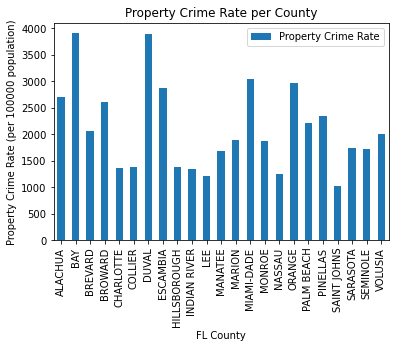

<Figure size 432x288 with 0 Axes>

In [19]:
# Bar chart with Property Crime Rate for each county.
ppc_graph = summary_df.plot(x="CountyName", y=["Property Crime Rate"], kind="bar")
plt.xlabel("FL County")
plt.ylabel("Property Crime Rate (per 100000 population)")
plt.title ("Property Crime Rate per County")
plt.yticks(np.arange(0, 4500, 500))
plt.legend (loc="best")
plt.savefig("PropertyCrimeRate.jpg")
plt.show()
plt.tight_layout()


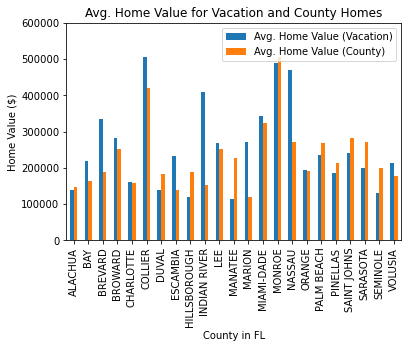

<Figure size 432x288 with 0 Axes>

In [20]:
# Grouped bar chart with Avg. Home Value for county-wide and vacation homes.
ppc_graph = summary_df.plot(x="CountyName", y=["Avg. Home Value (Vacation)", "Avg. Home Value (County)"], kind="bar")
plt.xlabel("County in FL")
plt.ylabel("Home Value ($)")
plt.title ("Avg. Home Value for Vacation and County Homes")
plt.yticks(np.arange(0, 650000, 100000))
plt.legend (loc="best")
plt.savefig("AvgHomeValue.jpg")
plt.show()
plt.tight_layout()


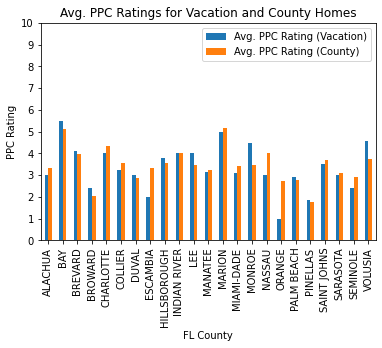

<Figure size 432x288 with 0 Axes>

In [21]:
# Grouped bar chart with Avg. PPC Rating for county-wide and vacation homes.
value_graph = summary_df.plot(x="CountyName", y=["Avg. PPC Rating (Vacation)", "Avg. PPC Rating (County)"], kind="bar")
plt.xlabel("FL County")
plt.ylabel("PPC Rating")
plt.title ("Avg. PPC Ratings for Vacation and County Homes")
plt.yticks(np.arange(0, 11, 1))
plt.savefig("AvgPPC.jpg")
plt.show()
plt.tight_layout()


The correlation between property crime rate and home value is -0.24, indicating NO correlation.
The linear regression equation between distance to firestation and home value is y = -27.31x + 288104.09.
The r-squared is: 0.059662978618013604


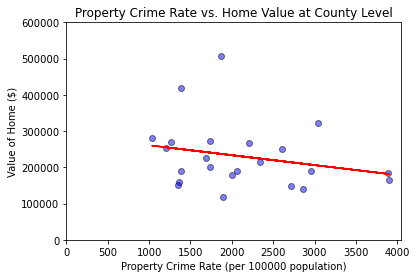

<Figure size 432x288 with 0 Axes>

In [22]:
#Correlation between Property Crime Rate & Value of Home at Vacation County Level.
property_crime= summary_df["Property Crime Rate"]
Value4 = summary_df["Avg. Home Value (County)"]

correlation4 = st.pearsonr(property_crime, Value4)

scatter4 = plt.scatter(property_crime, Value4, marker="o", facecolors="blue", edgecolors="black", alpha=0.5)
(slope4, intercept4, rvalue4, pvalue4, stderr4) = linregress(property_crime, Value4)

regress_values4 = property_crime * slope4 + intercept4

line_eq4 = "y = " + str(round(slope4,2)) + "x + " + str(round(intercept4,2))

print(f"The correlation between property crime rate and home value is {round(correlation4[0],2)}, indicating NO correlation.")
print(f"The linear regression equation between distance to firestation and home value is {line_eq4}.")
print(f"The r-squared is: {rvalue4**2}")

plt.plot(property_crime,regress_values4,"r-")
plt.title("Property Crime Rate vs. Home Value at County Level")
plt.ylabel("Value of Home ($)")
plt.xlabel("Property Crime Rate (per 100000 population)")
plt.yticks(np.arange(0, 650000, 100000))
plt.xticks(np.arange(0, 4500, 500))
plt.show()
plt.tight_layout()

In [23]:
file = 'House_price_multifeatures.csv'
df = pd.read_csv(file)
all_county_df = df[["Id", "CountyName", "ValueofHome"]]

all_county = all_county_df.groupby(["CountyName"])

all_county_homes = all_county["Id"].count()
all_county_value = all_county["ValueofHome"].mean()
all_county_value_std = all_county["ValueofHome"].std()

all_county_summary_df = pd.DataFrame(all_county_homes)
all_county_summary_df["Avg. Home Value (County)"] = round(all_county_value,2)
all_county_summary_df["Std Home Value (County)"] = round(all_county_value_std,2)

all_county_summary_df = all_county_summary_df.rename(columns={"Id": "Total Homes"})

all_county_summary_df

/Users/ajwu/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (12) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Total Homes,Avg. Home Value (County),Std Home Value (County)
CountyName,,,
ALACHUA,212,155240.09,88375.15
BAKER,5,86613.40,16440.99
BAY,496,151496.27,113167.58
BRADFORD,3,91304.00,49046.34
BREVARD,3399,186817.59,124349.95
...,...,...,...
TAYLOR,4,191322.50,104599.97
UNION,2,81343.00,12365.88
VOLUSIA,2349,180868.83,126787.89


In [24]:
#all_county_summary_df does not include Calhoun, Gilchrist, Hamilton, Holmes, Lafayette & Washington counties.
allcounty_list= all_county_df["CountyName"].unique()

In [25]:
file3 = 'FLCounties_Ed_Crime.csv'
FL_ed_crime_df = pd.read_csv(file3)

FL_ed_crime_df

FL_ed_crime_df = FL_ed_crime_df
all_county_df = pd.merge(FL_ed_crime_df, all_county_summary_df, how = "inner", on="CountyName")

all_county_df

,CountyName,% of Total Ed Points,2019 Grade,Property Crime Rate,Total Homes,Avg. Home Value (County),Std Home Value (County)
0,ALACHUA,62,A,2710.4,212,155240.09,88375.15
1,BAKER,59,B,973.5,5,86613.40,16440.99
2,BAY,60,B,3411.6,496,151496.27,113167.58
3,BRADFORD,53,C,1544.5,3,91304.00,49046.34
4,BREVARD,64,A,2063.9,3399,186817.59,124349.95
...,...,...,...,...,...,...,...
56,TAYLOR,62,A,2360.0,4,191322.50,104599.97
57,UNION,61,B,535.3,2,81343.00,12365.88
58,VOLUSIA,57,B,2008.0,2349,180868.83,126787.89
59,WAKULLA,65,A,1525.4,14,157630.43,65390.37


The correlation between property crime rate and home value is 0.08, indicating NO correlation.
The linear regression equation between distance to firestation and home value is y = 11.81x + 158477.95.
The r-squared is: 0.007069879527787682


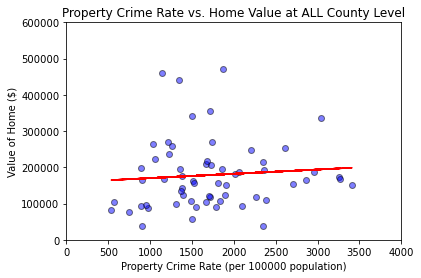

<Figure size 432x288 with 0 Axes>

In [26]:
#Correlation between Property Crime Rate & Value of Home at ALL County Level.
FLproperty_crime= all_county_df["Property Crime Rate"]
Value5 = all_county_df["Avg. Home Value (County)"]

correlation5 = st.pearsonr(FLproperty_crime, Value5)

scatter5 = plt.scatter(FLproperty_crime, Value5, marker="o", facecolors="blue", edgecolors="black", alpha=0.5)
(slope5, intercept5, rvalue5, pvalue5, stderr5) = linregress(FLproperty_crime, Value5)

regress_values5 = FLproperty_crime * slope5 + intercept5

line_eq5 = "y = " + str(round(slope5,2)) + "x + " + str(round(intercept5,2))

print(f"The correlation between property crime rate and home value is {round(correlation5[0],2)}, indicating NO correlation.")
print(f"The linear regression equation between distance to firestation and home value is {line_eq5}.")
print(f"The r-squared is: {rvalue5**2}")

plt.plot(FLproperty_crime,regress_values5,"r-")
plt.title("Property Crime Rate vs. Home Value at ALL County Level")
plt.ylabel("Value of Home ($)")
plt.xlabel("Property Crime Rate (per 100000 population)")
plt.yticks(np.arange(0, 650000, 100000))
plt.xticks(np.arange(0, 4500, 500))
plt.show()
plt.tight_layout()

The correlation between % Total Ed Points and home value is 0.4, indicating weak positive correlation.
The linear regression equation between % Total Ed Points and home value is y = 7197.12x + -247981.6.
The r-squared is: 0.16129695305983552


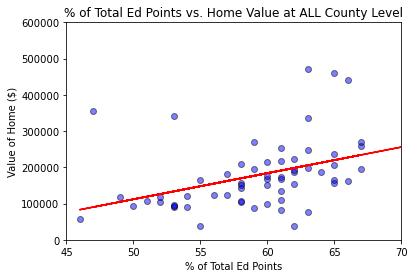

<Figure size 432x288 with 0 Axes>

In [27]:
#Correlation between Ed Score & Value of Home at ALL County Level.
FLproperty_ed= all_county_df["% of Total Ed Points"]
Value6 = all_county_df["Avg. Home Value (County)"]

correlation6 = st.pearsonr(FLproperty_ed, Value6)

scatter6 = plt.scatter(FLproperty_ed, Value6, marker="o", facecolors="blue", edgecolors="black", alpha=0.5)
(slope6, intercept6, rvalue6, pvalue6, stderr6) = linregress(FLproperty_ed, Value6)

regress_values6 = FLproperty_ed * slope6 + intercept6

line_eq6 = "y = " + str(round(slope6,2)) + "x + " + str(round(intercept6,2))

print(f"The correlation between % Total Ed Points and home value is {round(correlation6[0],2)}, indicating weak positive correlation.")
print(f"The linear regression equation between % Total Ed Points and home value is {line_eq6}.")
print(f"The r-squared is: {rvalue6**2}")

plt.plot(FLproperty_ed,regress_values6,"r-")
plt.title("% of Total Ed Points vs. Home Value at ALL County Level")
plt.ylabel("Value of Home ($)")
plt.xlabel("% of Total Ed Points")
plt.yticks(np.arange(0, 650000, 100000))
plt.xlim(45, 70)
plt.show()
plt.tight_layout()

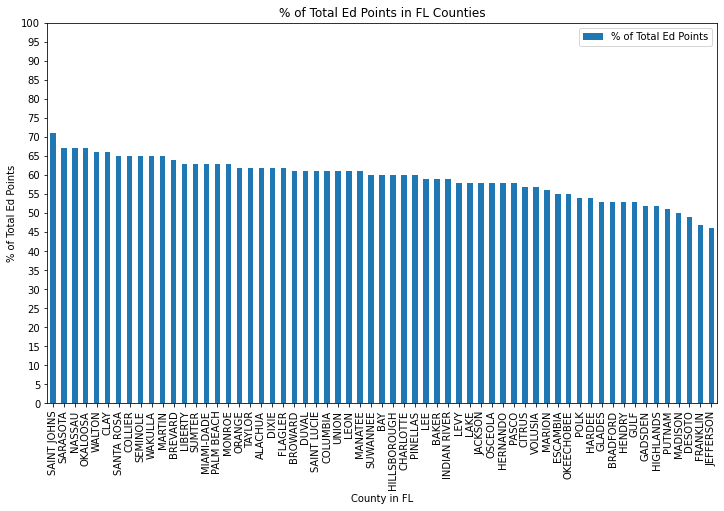

<Figure size 432x288 with 0 Axes>

In [28]:
#Ed Score in ALL Counties.
county_ed_df = all_county_df[["CountyName", "% of Total Ed Points"]]
county_ed_df = county_ed_df.sort_values("% of Total Ed Points", ascending=False)
county_ed_plot = county_ed_df.plot(x="CountyName", y="% of Total Ed Points", kind="bar", figsize=(12,7))
plt.title("% of Total Ed Points in FL Counties")
plt.ylabel("% of Total Ed Points")
plt.xlabel("County in FL")
plt.yticks(np.arange(0, 105, 5))
plt.savefig("ed.jpg")
plt.show()
plt.tight_layout()

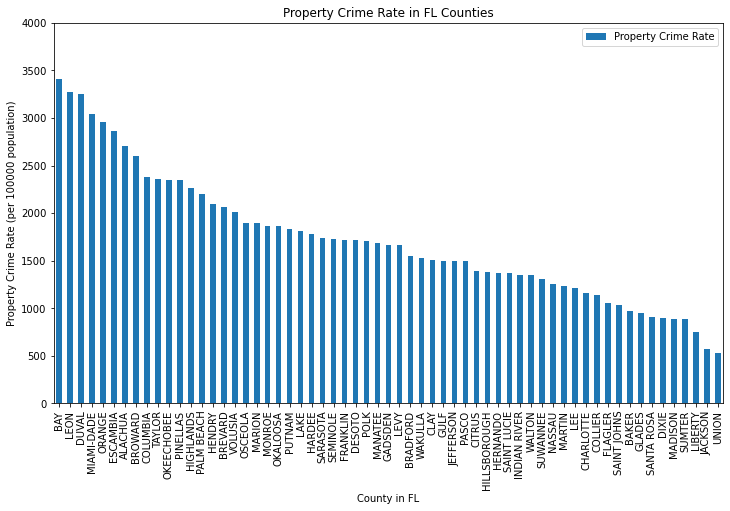

<Figure size 432x288 with 0 Axes>

In [29]:
#Property Crime Rate in ALL Counties.
county_crime_df = all_county_df[["CountyName", "Property Crime Rate"]]
county_crime_df = county_crime_df.sort_values("Property Crime Rate", ascending=False)
county_crime_plot = county_crime_df.plot(x="CountyName", y="Property Crime Rate", kind="bar", figsize=(12,7))
plt.title("Property Crime Rate in FL Counties")
plt.ylabel("Property Crime Rate (per 100000 population)")
plt.xlabel("County in FL")
plt.yticks(np.arange(0, 4500, 500))
plt.savefig("crime.jpg")
plt.show()
plt.tight_layout()

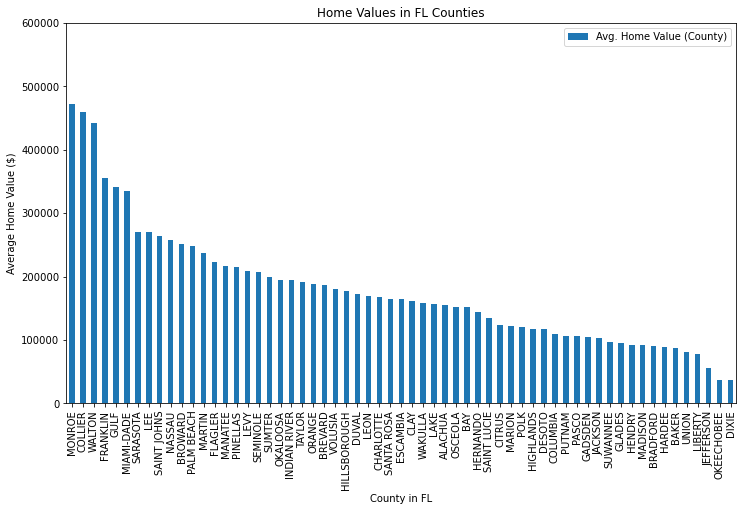

<Figure size 432x288 with 0 Axes>

In [30]:
#Avg Home Values in ALL Counties.
county_value_df = all_county_df[["CountyName", "Avg. Home Value (County)"]]
county_value_df = county_value_df.sort_values("Avg. Home Value (County)", ascending=False)
county_value_plot = county_value_df.plot(x="CountyName", y="Avg. Home Value (County)", kind="bar", figsize=(12,7))
plt.title("Home Values in FL Counties")
plt.ylabel("Average Home Value ($)")
plt.xlabel("County in FL")
plt.yticks(np.arange(0, 650000, 100000))
plt.savefig("value.jpg")
plt.show()
plt.tight_layout()